# UML Diagram Creation

In [1]:
#pip install pylint nbqa graphviz

In [2]:
#conda install -c conda-forge graphviz

In [3]:
#pip show pylint

In [25]:
from PIL import Image
import os
import os
import subprocess
from IPython.display import Image
from graphviz import Digraph
from IPython.display import Image, display
try:
    from PT3S import dxAndMxHelperFcts
except:
    import dxAndMxHelperFcts

## Class Diagram

In [5]:
project_root = r'C:\Users\jablonski\3S\PT3S'
output_dir = r'C:\Users\jablonski\3S\PT3S\sphinx_docs\uml'

In [6]:
modules = [
    'Am.py', 'conf.py', 'Dx.py', 'dxAndMxHelperFcts.py', 'dxAecodeObjsAata.py',
    'Lx.py', 'Mx.py', 'ncd.py', 'NFA.py', 'pNFA.py', 'Rm.py', 'sdfCsv.py', 'setup.py',
    'Xm.py', 'lds/rpts.py', 'lds/__init__.py', 'UTILS/Ab.py', 'UTILS/Xml.py', 'UTILS/__init__.py'
]
modules = [
    'Dx.py', 'dxAndMxHelperFcts.py', 'Mx.py'
]

In [7]:
# Change to the directory containing your project
os.chdir(r'C:\Users\jablonski\3S\PT3S\sphinx_docs\uml')

In [8]:
#!python "C:\Users\jablonski\AppAata\Local\anaconda3\Scripts\pyreverse-script.py" -o html -p PT3S .

In [9]:
for module in modules:
    module_path = os.path.join(project_root, module)
    output_prefix = os.path.splitext(os.path.basename(module))[0]
    
    # Run pyreverse command
    command = [
        'pyreverse', '-o', 'png', '-p', output_prefix, '-d', output_dir, module_path
    ]
    subprocess.run(command, check=True)

In [10]:
from PIL import Image
def crop_image(image_path, x_percent):
    # Open an image file
    with Image.open(image_path) as img:
        # Calculate the cropping box
        width, height = img.size
        new_width = width - int(width * (x_percent / 100))
        box = (0, 0, new_width, height)
        
        # Crop the image
        cropped_img = img.crop(box)
        
        # Save the cropped image with '_cropped' suffix
        base, ext = os.path.splitext(image_path)
        cropped_image_path = f"{base}_cropped{ext}"
        cropped_img.save(cropped_image_path)
        
        return cropped_image_path

In [11]:
image_path = r'C:\\Users\\jablonski\\3S\\PT3S\\sphinx_docs\\uml\\classes_dxAndMxHelperFcts.png'

In [12]:
x_percent = 72 # Percentage to crop from the right

In [13]:
cropped_image_path = crop_image(image_path, x_percent)
print(f"Cropped image saved at: {cropped_image_path}")

Cropped image saved at: C:\\Users\\jablonski\\3S\\PT3S\\sphinx_docs\\uml\\classes_dxAndMxHelperFcts_cropped.png


## Diagram 2

In [14]:
dot = Digraph()

# Main node in its own cluster
with dot.subgraph(name='cluster_root') as c:
    c.attr(label='', color='white', fontsize='14', fontname='Arial Bold')
    c.node('A', 'dxWithMx', color='white', style='filled', fontsize='14', fontname='Arial Bold')

# Dx object and its attributes
dot.node('B', 'Dx object', color='blue', style='filled', fontsize='14', fontname='Arial Bold')
dot.edge('A', 'B')

with dot.subgraph(name='cluster_0') as c:
    c.attr(label='Dx object Group', color='blue', fontsize='14', fontname='Arial Bold')
    c.node('B1', 'dx.dataFrames', color='blue', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('B', 'B1')

# Mx object and its attributes
dot.node('C', 'Mx object', color='red', style='filled', fontsize='14', fontname='Arial Bold')
dot.edge('A', 'C')

with dot.subgraph(name='cluster_1') as c:
    c.attr(label='Mx object Group', color='red', fontsize='14', fontname='Arial Bold')
    c.node('C1', 'mx.df', color='red', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('C2', 'mx.dfVecAggs', color='red', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('C', 'C1')
    c.edge('C', 'C2')

# Miscellaneous attributes
with dot.subgraph(name='cluster_2') as c:
    c.attr(label='Miscellaneous Group', color='pink', fontsize='14', fontname='Arial Bold')
    c.node('A13', 'wDirMx', color='pink', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A14', 'SirCalcXmlFile', color='pink', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A15', 'SirCalcExeFile', color='pink', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('A', 'A13')
    c.edge('A', 'A14')
    c.edge('A', 'A15')

# pandas-Dfs with Model AND Result Data
with dot.subgraph(name='cluster_3') as c:
    c.attr(label='pandas-Dfs Group', color='purple', fontsize='14', fontname='Arial Bold')
    c.node('A1', 'V3_ROHR', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A2', 'V3_FWVB', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A3', 'V3_KNOT', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A4', 'V3_VBEL', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A5', 'V3_ROHRVEC', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A6', 'V3_AGSN', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A7', 'V3_AGSNVEC', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('A', 'A1')
    c.edge('A', 'A2')
    c.edge('A', 'A3')
    c.edge('A', 'A4')
    c.edge('A', 'A5')
    c.edge('A', 'A6')
    c.edge('A', 'A7')

# geopandas-Dfs
with dot.subgraph(name='cluster_4') as c:
    c.attr(label='geopandas-Dfs Group', color='orange', fontsize='14', fontname='Arial Bold')
    c.node('A8', 'gdf_ROHR', color='orange', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A9', 'gdf_FWVB', color='orange', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A10', 'gdf_KNOT', color='orange', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('A', 'A8')
    c.edge('A', 'A9')
    c.edge('A', 'A10')

# NetworkX-Graphs
with dot.subgraph(name='cluster_5') as c:
    c.attr(label='NetworkX-Graphs Group', color='lime', fontsize='14', fontname='Arial Bold')
    c.node('A11', 'G', color='lime', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A12', 'GSig', color='lime', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('A', 'A11')
    c.edge('A', 'A12')

# Set the direction of the graph layout to left-to-right
dot.attr(rankdir='LR')

# Save the diagram to the specified path
dot.render('dxWithMx_diagram', format='png')

'dxWithMx_diagram.png'

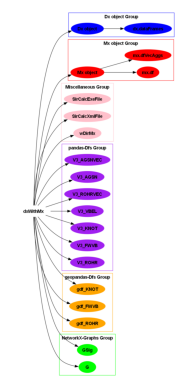

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('dxWithMx_diagram.png')
imgplot = plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [16]:
from PIL import Image

# Open the images
image1 = Image.open('classes_dxAndMxHelperFcts_cropped.png')
image2 = Image.open('dxWithMx_diagram.png')

# Resize images to have the same height
height = max(image1.height, image2.height)
image1 = image1.resize((int(image1.width * height / image1.height), height))
image2 = image2.resize((int(image2.width * height / image2.height), height))

# Create a new image with the combined width of both images
combined_width = image1.width + image2.width
new_image = Image.new('RGB', (combined_width, height))

# Paste the images side by side
new_image.paste(image1, (0, 0))
new_image.paste(image2, (image1.width, 0))

# Save the new image
new_image.save('combined_image.png')

# Display the new image
new_image.show()

# Diagram 3

In [18]:
from graphviz import Digraph

dot = Digraph()

# Main node in its own cluster
with dot.subgraph(name='cluster_root') as c:
    c.attr(label='', color='white', fontsize='14', fontname='Arial Bold')
    c.node('A', 'dxWithMx', color='white', style='filled', fontsize='14', fontname='Arial Bold')

# Dx object and its attributes
dot.node('B', 'Dx object', color='blue', style='filled', fontsize='14', fontname='Arial Bold')
dot.edge('A', 'B')

with dot.subgraph(name='cluster_0') as c:
    c.attr(label='Dx object Group', color='blue', fontsize='14', fontname='Arial Bold')
    c.node('B1', 'dx.dataFrames', color='blue', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('B', 'B1')

# Mx object and its attributes
dot.node('C', 'Mx object', color='red', style='filled', fontsize='14', fontname='Arial Bold')
dot.edge('A', 'C')

with dot.subgraph(name='cluster_1') as c:
    c.attr(label='Mx object Group', color='red', fontsize='14', fontname='Arial Bold')
    c.node('C1', 'mx.df', color='red', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('C2', 'mx.dfVecAggs', color='red', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('C', 'C1')
    c.edge('C', 'C2')

# Miscellaneous attributes
with dot.subgraph(name='cluster_2') as c:
    c.attr(label='Miscellaneous Group', color='pink', fontsize='14', fontname='Arial Bold')
    c.node('A13', 'wDirMx', color='pink', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A14', 'SirCalcXmlFile', color='pink', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A15', 'SirCalcExeFile', color='pink', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('A', 'A13')
    c.edge('A', 'A14')
    c.edge('A', 'A15')

# pandas-Dfs with Model AND Result Data
with dot.subgraph(name='cluster_3') as c:
    c.attr(label='pandas-Dfs Group', color='purple', fontsize='14', fontname='Arial Bold')
    c.node('A1', 'V3_ROHR', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A2', 'V3_FWVB', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A3', 'V3_KNOT', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A4', 'V3_VBEL', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A5', 'V3_ROHRVEC', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A6', 'V3_AGSN', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A7', 'V3_AGSNVEC', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('A', 'A1')
    c.edge('A', 'A2')
    c.edge('A', 'A3')
    c.edge('A', 'A4')
    c.edge('A', 'A5')
    c.edge('A', 'A6')
    c.edge('A', 'A7')

    # Adding child nodes for V3_ROHR
    c.node('A1_1', 'PH_i,_k', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A1_2', 'H_i,_k', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A1_3', 'mlc_i,_k', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A1_4', 'RHO_i,_k', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A1_5', 'T_i,_k', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A1_6', 'QM', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('A1', 'A1_1')
    c.edge('A1', 'A1_2')
    c.edge('A1', 'A1_3')
    c.edge('A1', 'A1_4')
    c.edge('A1', 'A1_5')
    c.edge('A1', 'A1_6')

    # Adding child nodes for V3_KNOT
    c.node('A3_1', 'PH', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A3_2', 'dPH', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A3_3', 'QM', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A3_4', 'srcvector', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('A3', 'A3_1')
    c.edge('A3', 'A3_2')
    c.edge('A3', 'A3_3')
    c.edge('A3', 'A3_4')

    # Adding child nodes for V3_VBEL
    c.node('A4_1', 'PH_i,_k', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A4_2', 'H_i,_k', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A4_3', 'mlc_i,_k', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A4_4', 'RHO_i,_k', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A4_5', 'T_i,_k', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A4_6', 'QM', color='purple', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('A4', 'A4_1')
    c.edge('A4', 'A4_2')
    c.edge('A4', 'A4_3')
    c.edge('A4', 'A4_4')
    c.edge('A4', 'A4_5')
    c.edge('A4', 'A4_6')

# geopandas-Dfs
with dot.subgraph(name='cluster_4') as c:
    c.attr(label='geopandas-Dfs Group', color='orange', fontsize='14', fontname='Arial Bold')
    c.node('A8', 'gdf_ROHR', color='orange', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A9', 'gdf_FWVB', color='orange', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A10', 'gdf_KNOT', color='orange', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('A', 'A8')
    c.edge('A', 'A9')
    c.edge('A', 'A10')

# NetworkX-Graphs
with dot.subgraph(name='cluster_5') as c:
    c.attr(label='NetworkX-Graphs Group', color='lime', fontsize='14', fontname='Arial Bold')
    c.node('A11', 'G', color='lime', style='filled', fontsize='14', fontname='Arial Bold')
    c.node('A12', 'GSig', color='lime', style='filled', fontsize='14', fontname='Arial Bold')
    c.edge('A', 'A11')
    c.edge('A', 'A12')

# Set the direction of the graph layout to left-to-right
dot.attr(rankdir='LR')

# Save the diagram to the specified path
dot.render('dxWithMx_diagram2', format='png')

'dxWithMx_diagram2.png'

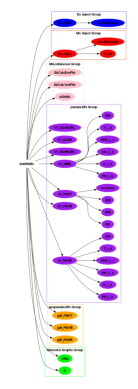

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('dxWithMx_diagram2.png')
imgplot = plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

# Diagram 4

In [21]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


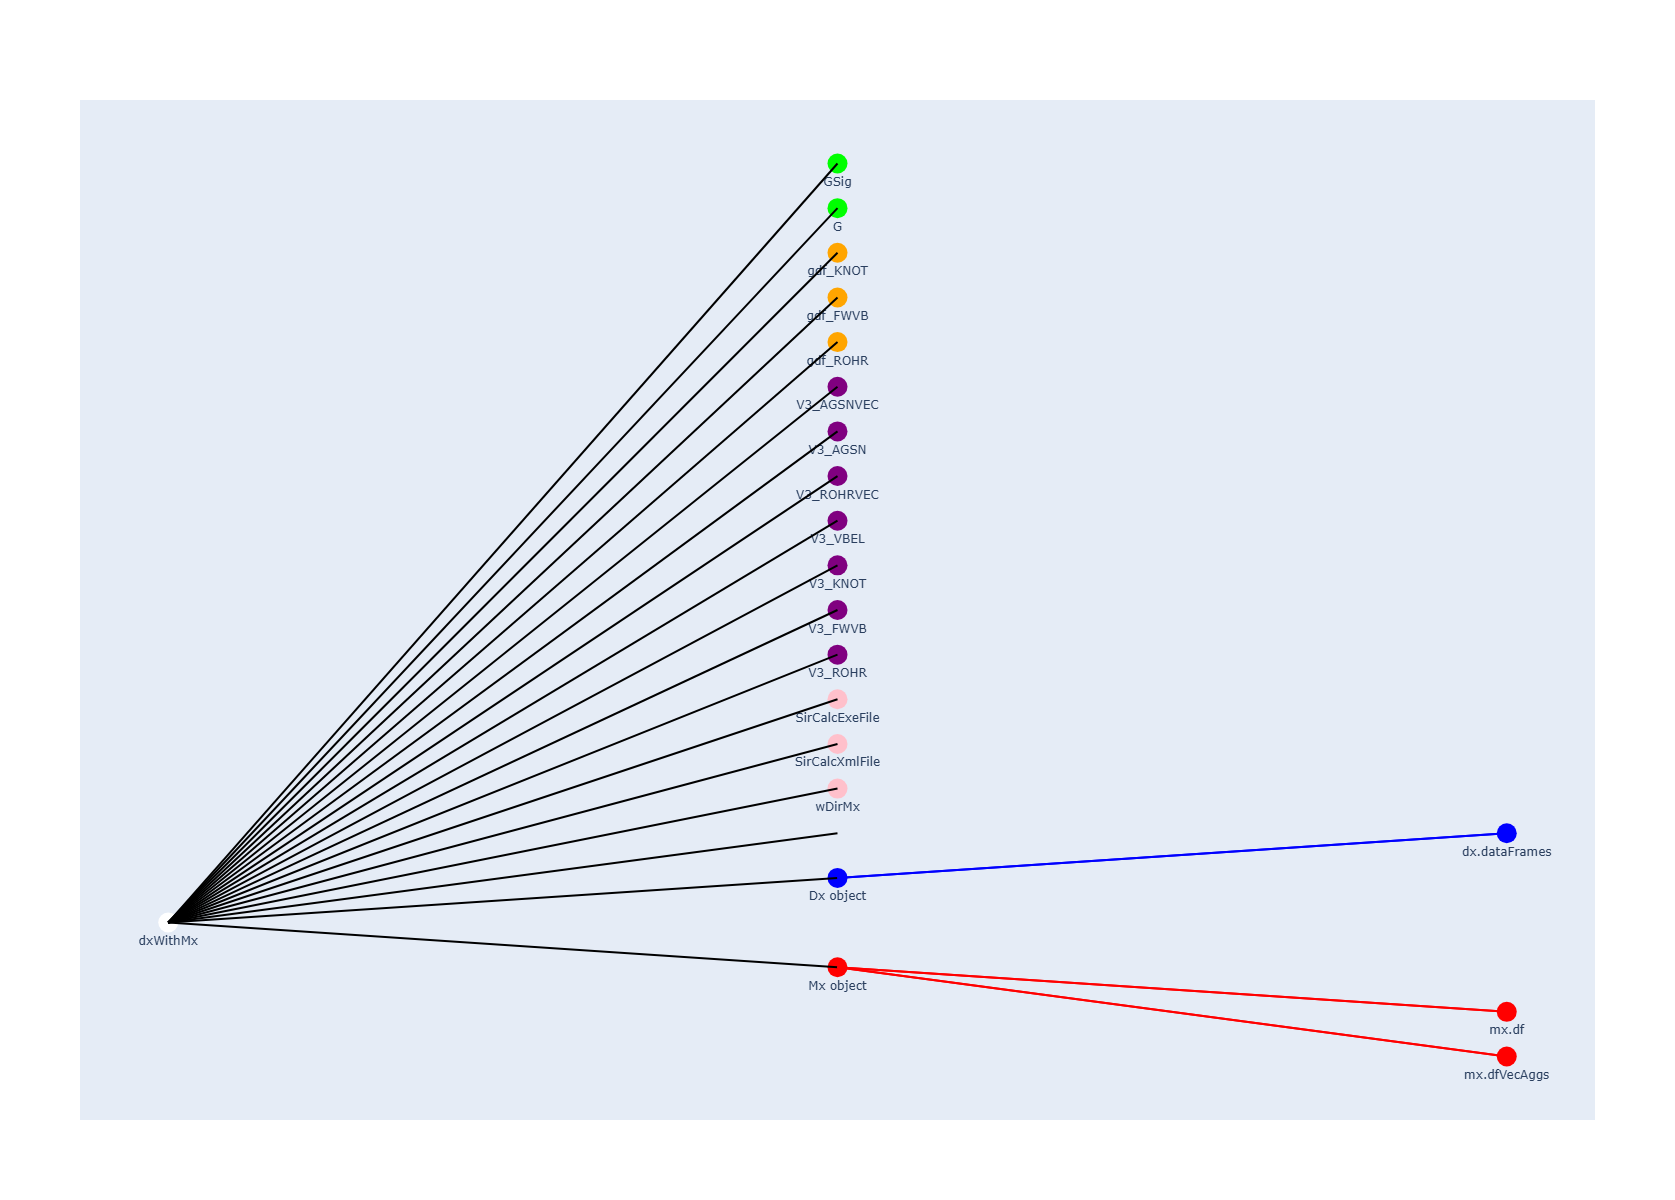

In [89]:
import plotly.graph_objects as go

fig = go.Figure()

# Main node
fig.add_trace(go.Scatter(x=[0], y=[0], mode='markers+text', text=['dxWithMx'], textposition='bottom center', marker=dict(size=20, color='white'), name='Main Node'))

# Dx object and its attributes
fig.add_trace(go.Scatter(x=[1], y=[1], mode='markers+text', text=['Dx object'], textposition='bottom center', marker=dict(size=20, color='blue'), name='Dx object'))
fig.add_trace(go.Scatter(x=[2], y=[2], mode='markers+text', text=['dx.dataFrames'], textposition='bottom center', marker=dict(size=20, color='blue'), name='dx.dataFrames'))

# Mx object and its attributes
fig.add_trace(go.Scatter(x=[1], y=[-1], mode='markers+text', text=['Mx object'], textposition='bottom center', marker=dict(size=20, color='red'), name='Mx object'))
fig.add_trace(go.Scatter(x=[2], y=[-2], mode='markers+text', text=['mx.df'], textposition='bottom center', marker=dict(size=20, color='red'), name='mx.df'))
fig.add_trace(go.Scatter(x=[2], y=[-3], mode='markers+text', text=['mx.dfVecAggs'], textposition='bottom center', marker=dict(size=20, color='red'), name='mx.dfVecAggs'))

# Miscellaneous attributes
fig.add_trace(go.Scatter(x=[1], y=[3], mode='markers+text', text=['wDirMx'], textposition='bottom center', marker=dict(size=20, color='pink'), name='wDirMx'))
fig.add_trace(go.Scatter(x=[1], y=[4], mode='markers+text', text=['SirCalcXmlFile'], textposition='bottom center', marker=dict(size=20, color='pink'), name='SirCalcXmlFile'))
fig.add_trace(go.Scatter(x=[1], y=[5], mode='markers+text', text=['SirCalcExeFile'], textposition='bottom center', marker=dict(size=20, color='pink'), name='SirCalcExeFile'))

# pandas-Dfs with Model AND Result Data
fig.add_trace(go.Scatter(x=[1], y=[6], mode='markers+text', text=['V3_ROHR'], textposition='bottom center', marker=dict(size=20, color='purple'), name='V3_ROHR'))
fig.add_trace(go.Scatter(x=[1], y=[7], mode='markers+text', text=['V3_FWVB'], textposition='bottom center', marker=dict(size=20, color='purple'), name='V3_FWVB'))
fig.add_trace(go.Scatter(x=[1], y=[8], mode='markers+text', text=['V3_KNOT'], textposition='bottom center', marker=dict(size=20, color='purple'), name='V3_KNOT'))
fig.add_trace(go.Scatter(x=[1], y=[9], mode='markers+text', text=['V3_VBEL'], textposition='bottom center', marker=dict(size=20, color='purple'), name='V3_VBEL'))
fig.add_trace(go.Scatter(x=[1], y=[10], mode='markers+text', text=['V3_ROHRVEC'], textposition='bottom center', marker=dict(size=20, color='purple'), name='V3_ROHRVEC'))
fig.add_trace(go.Scatter(x=[1], y=[11], mode='markers+text', text=['V3_AGSN'], textposition='bottom center', marker=dict(size=20, color='purple'), name='V3_AGSN'))
fig.add_trace(go.Scatter(x=[1], y=[12], mode='markers+text', text=['V3_AGSNVEC'], textposition='bottom center', marker=dict(size=20, color='purple'), name='V3_AGSNVEC'))

# geopandas-Dfs
fig.add_trace(go.Scatter(x=[1], y=[13], mode='markers+text', text=['gdf_ROHR'], textposition='bottom center', marker=dict(size=20, color='orange'), name='gdf_ROHR'))
fig.add_trace(go.Scatter(x=[1], y=[14], mode='markers+text', text=['gdf_FWVB'], textposition='bottom center', marker=dict(size=20, color='orange'), name='gdf_FWVB'))
fig.add_trace(go.Scatter(x=[1], y=[15], mode='markers+text', text=['gdf_KNOT'], textposition='bottom center', marker=dict(size=20, color='orange'), name='gdf_KNOT'))

# NetworkX-Graphs
fig.add_trace(go.Scatter(x=[1], y=[16], mode='markers+text', text=['G'], textposition='bottom center', marker=dict(size=20, color='lime'), name='G'))
fig.add_trace(go.Scatter(x=[1], y=[17], mode='markers+text', text=['GSig'], textposition='bottom center', marker=dict(size=20, color='lime'), name='GSig'))

# Branches
for i in range(1, 18):
    fig.add_shape(type='line', x0=0, y0=0, x1=1, y1=i, line=dict(color='black', width=2))

# Add edges between dxWithMx and mx
fig.add_shape(type='line', x0=0, y0=0, x1=1, y1=-1, line=dict(color='black', width=2))

# Add edges between Dx object and its children
fig.add_shape(type='line', x0=1, y0=1, x1=2, y1=2, line=dict(color='blue', width=2))

# Add edges between Mx object and its children
fig.add_shape(type='line', x0=1, y0=-1, x1=2, y1=-2, line=dict(color='red', width=2))
fig.add_shape(type='line', x0=1, y0=-1, x1=2, y1=-3, line=dict(color='red', width=2))

# Connect Dx object with its child attributes
fig.add_shape(type='line', x0=1, y0=1, x1=2, y1=2, line=dict(color='blue', width=2))

# Connect Mx object with its child attributes
fig.add_shape(type='line', x0=1, y0=-1, x1=2, y1=-2, line=dict(color='red', width=2))
fig.add_shape(type='line', x0=1, y0=-1, x1=2, y1=-3, line=dict(color='red', width=2))

# Set layout
fig.update_layout(
    title=None,
    xaxis=dict(showgrid=False, zeroline=False, visible=False),
    yaxis=dict(showgrid=False, zeroline=False, visible=False),
    showlegend=False,
    autosize=False,
    width=800,
    height=1200,
)
fig.write_html('interactive_diagram.html')
# Display the figure
fig.show()

# Diagram 5

In [26]:
dbFilename="Example1"
dbFile=os.path.join(os.path.dirname(os.path.abspath(dxAndMxHelperFcts.__file__))
                    +'/Examples/'
                    +dbFilename
                    +'.db3'
)

In [72]:
m=dxAndMxHelperFcts.readDxAndMx(dbFile=dbFile                                 
                                ,preventPklDump=True
)

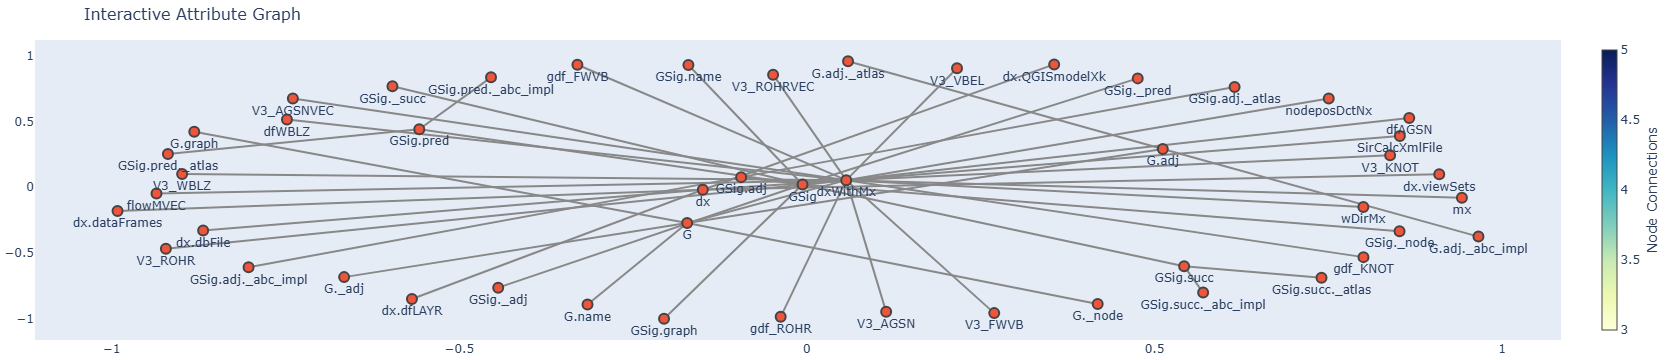

In [61]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

def get_attributes(obj, depth=1, current_depth=0, parent_name='', filter_list=None):
    """
    Recursively get attributes of an object and its children up to a specified depth.
    If an attribute is a DataFrame, get its columns instead of its child attributes.
    Apply a filter to include only specified attributes without their child attributes.

    Parameters:
    obj (object): The object to inspect.
    depth (int): The maximum depth to inspect.
    current_depth (int): The current depth of inspection.
    parent_name (str): The name of the parent attribute.
    filter_list (list): A list of attribute names to include without their child attributes.

    Returns:
    dict: A dictionary containing the attributes and their values.
    """
    if current_depth > depth:
        return {}

    if filter_list is None:
        filter_list = []

    attributes = {}
    for attr_name in dir(obj):
        if not attr_name.startswith('__'):
            try:
                attr_value = getattr(obj, attr_name)
                full_attr_name = f"{parent_name}.{attr_name}" if parent_name else attr_name

                if isinstance(attr_value, pd.DataFrame):
                    # If the attribute is a DataFrame, get its columns
                    attributes[full_attr_name] = list(attr_value.columns)
                elif not callable(attr_value):
                    attributes[full_attr_name] = None  # Only store the attribute name

                    # Recursively get child attributes unless the attribute is in the filter list
                    if attr_name not in filter_list:
                        child_attributes = get_attributes(attr_value, depth, current_depth + 1, full_attr_name, filter_list)
                        attributes.update(child_attributes)
            except Exception as e:
                print(f"Could not access attribute {attr_name}: {e}")

    return attributes

def create_graph(attributes, root):
    """
    Create a graph with direct child attributes connected to their parent.

    Parameters:
    attributes (dict): A dictionary containing the attributes and their values.
    root (str): The name of the root node.

    Returns:
    networkx.DiGraph: A directed graph with attributes as nodes and connections as edges.
    """
    G = nx.DiGraph()
    
    for attr in attributes.keys():
        parts = attr.split('.')
        for i in range(1, len(parts)):
            parent = '.'.join(parts[:i])
            child = '.'.join(parts[:i+1])
            G.add_edge(parent, child)
    
    # Add root node and connect it to top-level attributes
    for attr in set(attr.split('.')[0] for attr in attributes.keys()):
        G.add_edge(root, attr)
    
    return G

def plot_interactive_graph(G):
    """
    Plot an interactive Plotly graph from a NetworkX graph.

    Parameters:
    G (networkx.DiGraph): A directed graph with attributes as nodes and connections as edges.
    """
    pos = nx.spring_layout(G)
    
    edge_x = []
    edge_y = []
    
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=2, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    node_text = []

    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_text.append(node)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=node_text,
        textposition='bottom center',
        hoverinfo='text',
        marker=dict(
            showscale=True,
            colorscale='YlGnBu',
            size=10,
            colorbar=dict(
                thickness=15,
                title='Node Connections',
                xanchor='left',
                titleside='right'
            ),
            line_width=2))

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title='Interactive Attribute Graph',
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        annotations=[dict(
                            text="",
                            showarrow=False,
                            xref="paper", yref="paper"
                        )],
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False))
                   )

    fig.show()

filter_list = ['mx']
attributes = get_attributes(m, depth=2, filter_list=filter_list)
G = create_graph(attributes, root='dxWithMx')

# Plot the interactive graph
plot_interactive_graph(G)

# Diagram 6